# Обзор алгоритмов машинного обучения

## 1. Особенности работы алгоритмов

Представьте графически работу различных алгортмов машинного обучения и сохраните картинки в отчете (удобней всего в google-docs). Для этого:
* Возьмите датасет вашего варианта (см. список ниже). Найдите два **количественных** признака, от которых сильнее всего зависит целевой. Далее работайте с датасетом, содержащим только эти два признака и целевой.
* Постройте график рассеяния всей выборки (отобразив цветом целевой класс) и небольшой случайной подвыборки, на которой вы будете тестировать алгоритмы (несколько десятков/сотен объектов). 
* Постройте карты работы следующих алгоритмов для разных значений параметров: sklearn.tree.DecisionTreeClassifier, sklearn.neighbors.KNeighborsClassifier, sklearn.svm.SVC с rbf ядром. Подберите параметры так, чтобы алгоритм оказался недообучен и переобучен. Отобразите те области карты, на которых лучше всего видна степень обученности модели и разместите две картинки в один ряд в отчете
* Сравните карты работы линейной регрессии sklearn.linear_model.LinearRegression с картой одного из более устойчивых линейных алгоритмов: sklearn.linear_model.LogisticRegression или sklearn.linear_model.RidgeCV или sklearn.svm.LinearSVC (разместите их в один ряд в отчете)
* Постройте карту работы наивного Байесовского классификатора sklearn.naive_bayes.GaussianNB
* Постройте карту работы композиции деревьев. Для небольших выборок лучше всего использовать sklearn.ensemble.ExtraTreesClassifier

## 2. Метрики качества

* Для логистической регрессии и переобученного дерева предскажите вероятности класса 1 для всех объектов *полной* выборки. Постройте на одном графике разными полупрозрачными цветами нормированные гистограммы вероятностей для обоих целевых классов (разместите гистограммы обоих алгоритмов друг рядом с другом в отчете).
* Найдите визуально наилучшее пороговое значение вероятности, которое отделяет один класс от другого для каждого алгоритма. Вычислите для этого порогового значения [метрики качества](https://en.wikipedia.org/wiki/Confusion_matrix): матрицу ошибок, Accuracy, TPR, FPR, TNR, FNR, Precision, Recall, F1-меру, Selectivity, Specificity, Balanced accuracy, Adjusted balanced accuracy (sklearn.metrics.balanced_accuracy_score). Оформите результаты в отчете в виде таблицы
* Прикрепите в Moodle ваш ноутбук и ссылку на ваш отчет (его нужно расшарить всем для чтения кнопкой Share)

## Варианты датасетов:
1. [Hepatitis C Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset) (целевой признак: пол пациента)
2. [Russian Demography Data](https://www.kaggle.com/datasets/dwdkills/russian-demography) (целевой признак: year<=2004)
3. [House prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv) (целевой признак: LotArea<=9480)
4. [Cryptocurrency Closing Price Prediction](https://zindi.africa/competitions/cryptocurrency-closing-price-prediction/data) (целевой признак: volatility<=0.013, удалите все строки, где не задана volatility)
5. [Video Game Sales](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings) (целевой признак: Rating==E)
6. [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) (целевой признак: Amount<=22)
7. [Pokemon Dataset with Team Combat](https://www.kaggle.com/code/tuannguyenvananh/descriptive-analysis-pokemon-eda-feat-satoshi/data?select=pokemon.csv) (целевой признак: Legendary)
8. [TMDB 5000 Movie Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv) (целевой признак: revenue>19млн)
9. [Body Fat Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset) (целевой признак: Neck<=38)
10. [Chess Game Dataset](https://www.kaggle.com/datasets/datasnaek/chess?select=games.csv) (целевой признак: winner==white)
11. [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) (целевой признак: residual sugar <= 2.2)
12. [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) (целевой признак: пол)
13. [Car Price Prediction Multiple Linear Regression](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction) (целевой признак: horsepower <= 100)
14. [Body performance Data](https://www.kaggle.com/datasets/kukuroo3/body-performance-data) (целевой признак: возраст <= 40)
15. [World Happiness Report](https://www.kaggle.com/datasets/unsdsn/world-happiness) (целевой признак: Family <= 1)
16. [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams) (целевой признак: lunch)
17. [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) (целевой признак: возраст <= 30)
18. [Другой датасет](https://www.kaggle.com/datasets) по согласованию с преподавателем практики и с изменением целевого признака (**датасеты у всех должны быть разными**). 

## Полезные кусочки кода

### отображение статистики:
```
pd.options.display.max_columns = data.shape[1]
data.describe(include='all')
```

### поиск "сильных" признаков:
```
import seaborn as sns
sns.set(rc={'figure.dpi':300})
label = 'укажите ваш целевой признак'
features = [c for c in data.columns if c != label and data.dtypes[c] != 'object']
X = data.loc[:,features]
y = data[label]
mi = sklearn.feature_selection.mutual_info_classif(X, y)
ax = sns.barplot(x=mi, y=features)
```

### график рассеяния:
```
ax = sns.scatterplot(data=data, x='имя столбца1', y='имя столбца2', hue=label, palette="deep")
```

### карта предсказания классификатора (цвет - вероятность класса 1):
```
x='имя столбца1'; y='имя столбца2'
model = конструктор модели

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (data[x].min(), data[x].max())
ylim = (data[y].min(), data[y].max())
model.fit(data.loc[:,[x,y]], data[label])
grid_x = np.linspace(data[x].min(), data[x].max(), 100)
grid_y = np.linspace(data[y].min(), data[y].max(), 100)
xx, yy = np.meshgrid(grid_x, grid_y)
grid = np.c_[xx.ravel(), yy.ravel()]
prediction = model.predict_proba(grid)[:,1].reshape(xx.shape)
ax.contourf(xx, yy, prediction, cmap=sns.color_palette("rocket", as_cmap=True))

ax = sns.scatterplot(data=data, x=x, y=y, hue=label, palette="rocket", ax=ax)
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
```

### гистограмма:
```
ax = sns.histplot(data=data, x="probability", hue=label, kde=True)
```

In [24]:
import pandas as pd
data = pd.read_csv("diabetes.csv", delimiter=',')

In [25]:
pd.options.display.max_columns = data.shape[1]
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


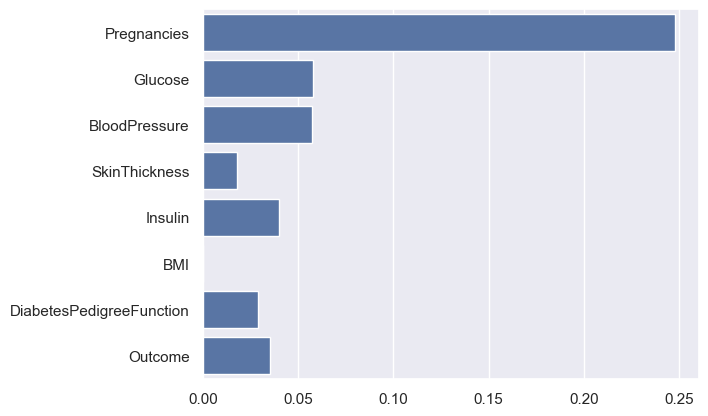

In [26]:
import seaborn as sns
import sklearn.feature_selection
sns.set(rc={'figure.dpi':100})

target_feature = 'Age' 

data[target_feature] = data[target_feature] < 30
data[target_feature] = data[target_feature].astype('int')

features = [c for c in data.columns if c != target_feature and data.dtypes[c] != 'object']
X = data.loc[:,features]
y = data[target_feature]

X_dropped = X.dropna()
y_dropped = y.loc[X_dropped.index]

mi = sklearn.feature_selection.mutual_info_classif(X_dropped, y_dropped)
ax = sns.barplot(x=mi, y=features)

In [27]:
top_1 = 'Pregnancies'
top_2 = 'Glucose'
data = data.loc[:, [top_1, top_2, target_feature]]
data.describe()

,Pregnancies,Glucose,Age
count,768.000000,768.000000,768.000000
mean,3.845052,120.894531,0.515625
std,3.369578,31.972618,0.500081
min,0.000000,0.000000,0.000000
25%,1.000000,99.000000,0.000000
50%,3.000000,117.000000,1.000000
75%,6.000000,140.250000,1.000000
max,17.000000,199.000000,1.000000


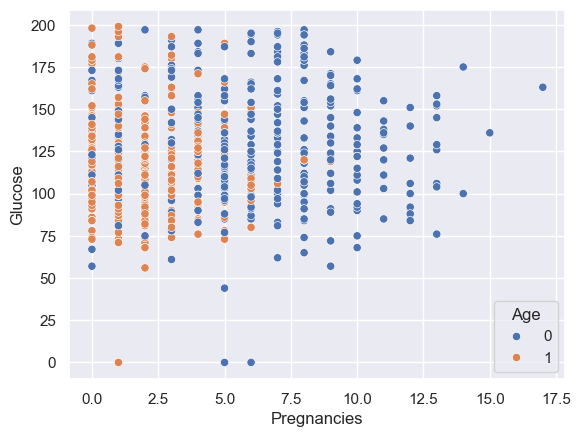

In [28]:
full = sns.scatterplot(data=data, x=top_1, y=top_2, hue=target_feature, palette="deep")

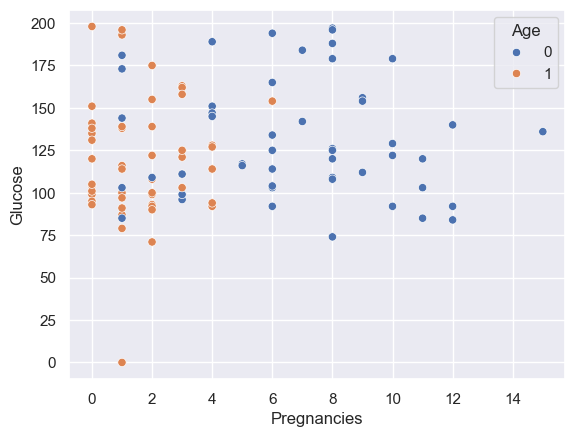

In [29]:
batch_size = 100
sample = data.sample(n = batch_size)
test = sns.scatterplot(data=sample, x=top_1, y=top_2, hue=target_feature, palette="deep")

In [30]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.neighbors
import sklearn.tree
import sklearn.svm

def pred_map(data, model, alt = False):
    x=top_1; y=top_2
    fig, ax = plt.subplots()
    xlim = (data[x].min(), data[x].max())
    ylim = (data[y].min(), data[y].max())
    model.fit(data.loc[:,[x,y]], data[target_feature])
    grid_x = np.linspace(data[x].min(), data[x].max(), 100)
    grid_y = np.linspace(data[y].min(), data[y].max(), 100)
    xx, yy = np.meshgrid(grid_x, grid_y)
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    if (alt):
        prediction = model.predict(grid).reshape(xx.shape)
    else:
        prediction = model.predict_proba(grid)[:,1].reshape(xx.shape)
    ax.contourf(xx, yy, prediction, cmap=sns.color_palette("rocket", as_cmap=True))

    ax = sns.scatterplot(data=data, x=x, y=y, hue=target_feature, palette="rocket", ax=ax)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)

In [47]:
treeTooBad = sklearn.tree.DecisionTreeClassifier(max_depth = 3)
treeTooGood = sklearn.tree.DecisionTreeClassifier(max_depth = 40)
neighborsTooBad = sklearn.neighbors.KNeighborsClassifier(n_neighbors=50)
neighborsTooGood = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
svcTooBad = sklearn.svm.SVC(probability = True, kernel = 'rbf', C = 0.0001, gamma = 10)
svcTooGood = sklearn.svm.SVC(probability = True, kernel = 'rbf', C = 30, gamma = 0.01)

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


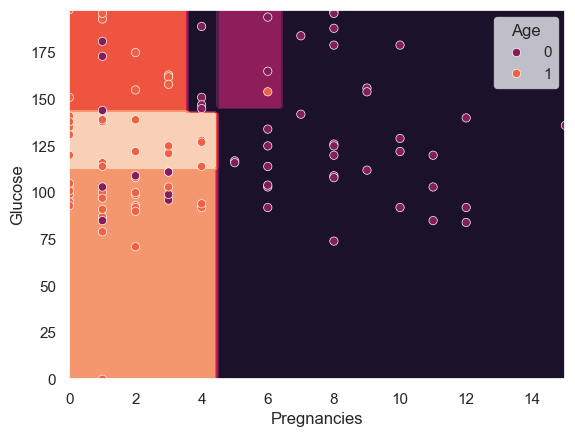

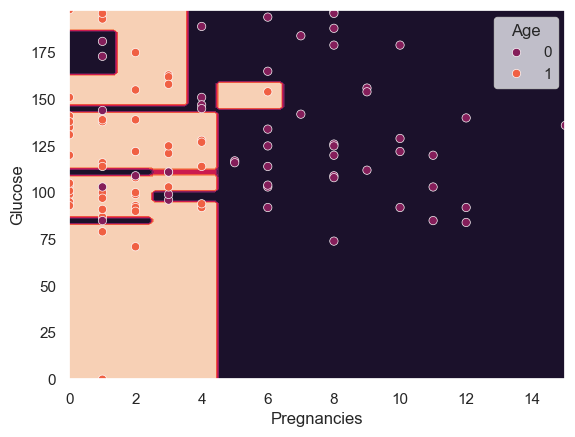

In [48]:
pred_map(sample, treeTooBad)
pred_map(sample, treeTooGood)

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


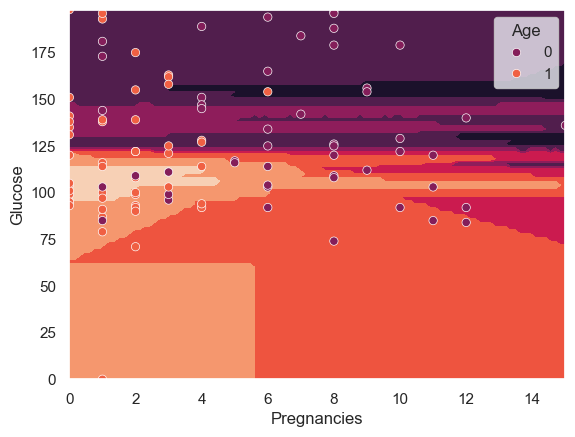

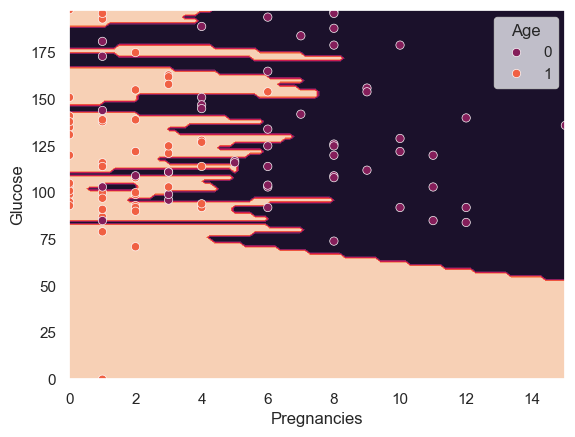

In [49]:
pred_map(sample, neighborsTooBad)
pred_map(sample, neighborsTooGood)

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


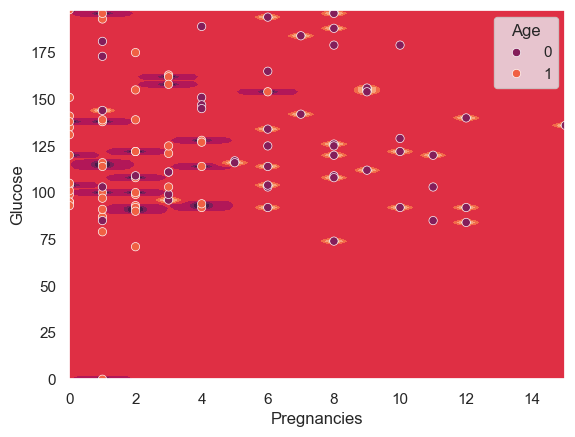

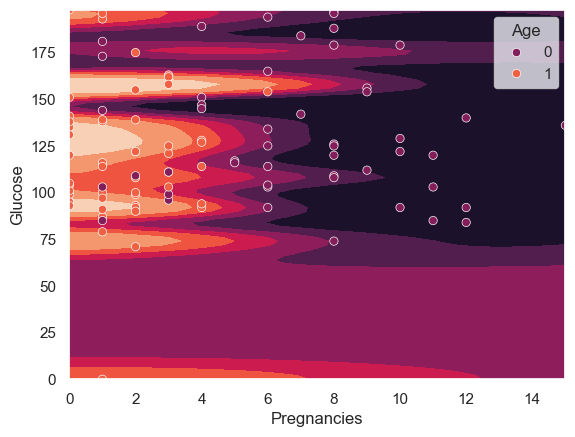

In [34]:
pred_map(sample, svcTooBad)
pred_map(sample, svcTooGood)

In [35]:
linear = sklearn.linear_model.LinearRegression()
logistic = sklearn.linear_model.LogisticRegression()

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


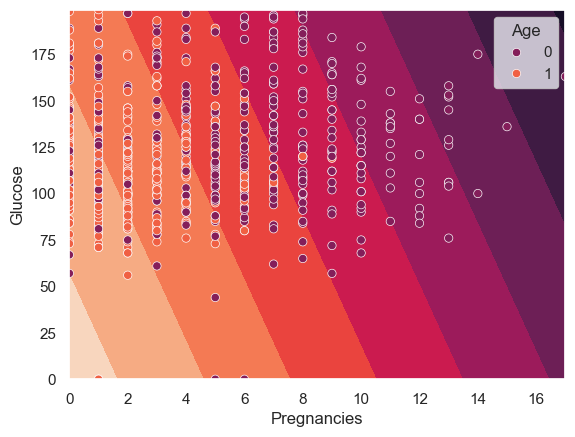

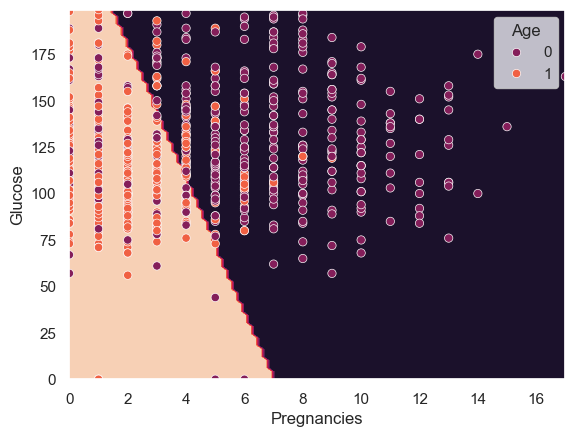

In [36]:
pred_map(data, linear, True)
pred_map(data, logistic, True)

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


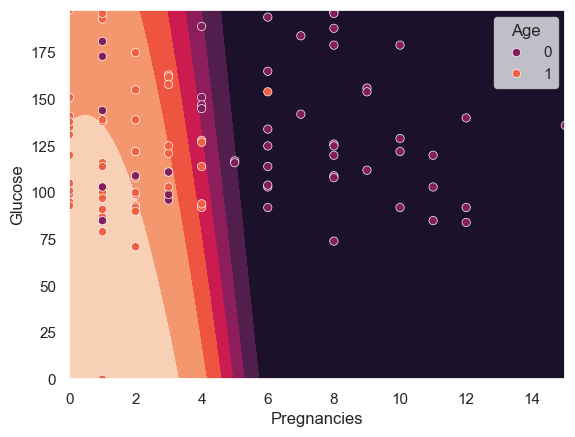

In [37]:
import sklearn.naive_bayes
mBay = sklearn.naive_bayes.GaussianNB()

pred_map(sample, mBay)

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


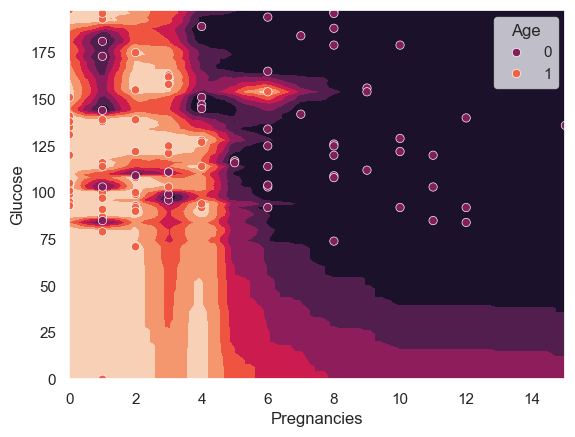

In [38]:
import sklearn.ensemble
mTrees = sklearn.ensemble.ExtraTreesClassifier()
pred_map(sample, mTrees)

* Для логистической регрессии и переобученного дерева предскажите вероятности класса 1 для всех объектов *полной* выборки. Постройте на одном графике разными полупрозрачными цветами нормированные гистограммы вероятностей для обоих целевых классов (разместите гистограммы обоих алгоритмов друг рядом с другом в отчете).
* Найдите визуально наилучшее пороговое значение вероятности, которое отделяет один класс от другого для каждого алгоритма. Вычислите для этого порогового значения [метрики качества](https://en.wikipedia.org/wiki/Confusion_matrix): матрицу ошибок, Accuracy, TPR, FPR, TNR, FNR, Precision, Recall, F1-меру, Selectivity, Specificity, Balanced accuracy, Adjusted balanced accuracy (sklearn.metrics.balanced_accuracy_score). Оформите результаты в отчете в виде таблицы


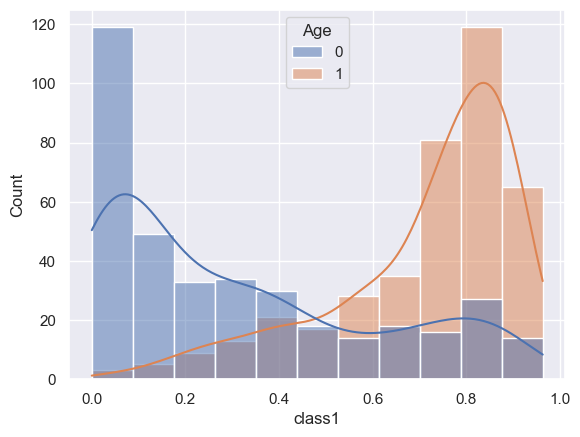

In [39]:
x=top_1; y=top_2
predLogist = logistic.predict_proba(data.loc[:,[x,y]])
df  = pd.DataFrame(predLogist,columns=['class0','class1'])
df[target_feature] = data[target_feature]
logist = sns.histplot(data=df, x='class1', hue=target_feature, kde=True)

In [50]:
pred = df['class1'] >= 0.5
true = df[target_feature]

In [51]:
P = len(true.loc[true == True])
N = len(true) - P

###
tmp = pred == true
tmp = pred.loc[tmp]
###

TP = len(tmp.loc[tmp == True])

###
tmp = pred == true
tmp = pred.loc[tmp]
###

TN = len(tmp.loc[tmp == False])

###
tmp = pred != true
tmp = pred.loc[tmp]
###

FP = len(tmp.loc[tmp == True])

###
tmp = pred != true
tmp = pred.loc[tmp]
###

FN = len(tmp.loc[tmp == False])

In [52]:
import sklearn.metrics as metr
print('Accuracy: ', metr.accuracy_score(true, pred))
print('TPR: ', TP/P)
print('FPR: ', FP/N)
print('TNR: ', TN/N)
print('FNR: ', FN/P)
# print('Precision: ', TP/(TP+FP))
print('Precision: ', metr.precision_score(true, pred))
# print('Recall: ', TP/P)
print('Recall: ', metr.recall_score(true, pred))
# print('F1 score: ', 2*TP/(2*TP+FP+FN))
print('F1 score: ', metr.f1_score(true, pred))
print('Selectivity: ', TN/N)
print('Specificity: ', TN/N)
print('Balanced accuracy: ', metr.balanced_accuracy_score(true, pred))
print('Adjusted balanced accuracy: ', metr.balanced_accuracy_score(true, pred, adjusted=True))

Accuracy:  0.7434895833333334
TPR:  0.7575757575757576
FPR:  0.271505376344086
TNR:  0.728494623655914
FNR:  0.24242424242424243
Precision:  0.7481296758104738
Recall:  0.7575757575757576
F1 score:  0.752823086574655
Selectivity:  0.728494623655914
Specificity:  0.728494623655914
Balanced accuracy:  0.7430351906158358
Adjusted balanced accuracy:  0.48607038123167157


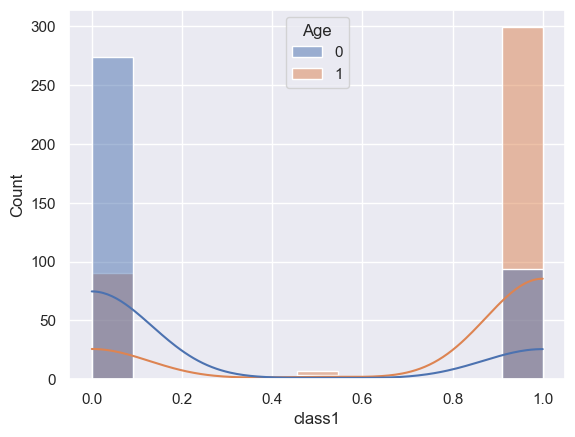

In [53]:
predTree = treeTooGood.predict_proba(data.loc[:,[x,y]])
df  = pd.DataFrame(predTree,columns=['class0','class1'])
df[target_feature] = data[target_feature]
tree = sns.histplot(data=df, x='class1', hue=target_feature, kde=True)

In [56]:
pred = df['class1'] >= 0.4
true = df[target_feature]

In [58]:
P = len(true.loc[true == True])
N = len(true) - P

###
tmp = pred == true
tmp = pred.loc[tmp]
###

TP = len(tmp.loc[tmp == True])

###
tmp = pred == true
tmp = pred.loc[tmp]
###

TN = len(tmp.loc[tmp == False])

###
tmp = pred != true
tmp = pred.loc[tmp]
###

FP = len(tmp.loc[tmp == True])

###
tmp = pred != true
tmp = pred.loc[tmp]
###

FN = len(tmp.loc[tmp == False])

In [59]:
print('Accuracy: ', metr.accuracy_score(true, pred))
print('TPR: ', TP/P)
print('FPR: ', FP/N)
print('TNR: ', TN/N)
print('FNR: ', FN/P)
# print('Precision: ', TP/(TP+FP))
print('Precision: ', metr.precision_score(true, pred))
# print('Recall: ', TP/P)
print('Recall: ', metr.recall_score(true, pred))
# print('F1 score: ', 2*TP/(2*TP+FP+FN))
print('F1 score: ', metr.f1_score(true, pred))
print('Selectivity: ', TN/N)
print('Specificity: ', TN/N)
print('Balanced accuracy: ', metr.balanced_accuracy_score(true, pred))
print('Adjusted balanced accuracy: ', metr.balanced_accuracy_score(true, pred, adjusted=True))

Accuracy:  0.7552083333333334
TPR:  0.7727272727272727
FPR:  0.26344086021505375
TNR:  0.7365591397849462
FNR:  0.22727272727272727
Precision:  0.7574257425742574
Recall:  0.7727272727272727
F1 score:  0.765
Selectivity:  0.7365591397849462
Specificity:  0.7365591397849462
Balanced accuracy:  0.7546432062561095
Adjusted balanced accuracy:  0.509286412512219
